In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv("./17-googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [24]:
df.shape

(10841, 13)

In [25]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [27]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [28]:
df["Reviews"].value_counts()

Reviews
0         596
1         272
2         214
3         175
4         137
         ... 
4272        1
5517        1
4057        1
459797      1
68935       1
Name: count, Length: 6002, dtype: int64

In [29]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [30]:
#df["Reviews"] = df["Reviews"].astype(dtype=int)

In [31]:
df["Reviews"].str.isnumeric().sum()

np.int64(10840)

In [32]:
#df[df["Reviews"] == "3.0M"]
df[~df["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [33]:
df_clean = df.copy()

In [34]:
df_clean.drop(index=10472, inplace=True)
df_clean[~df_clean["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [35]:
df_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [36]:
df_clean["Reviews"] = df_clean["Reviews"].astype(dtype=int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [37]:
df_clean.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [38]:
df["Size"].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
552k                     1
885k                     1
1020k                    1
582k                     1
619k                     1
Name: count, Length: 462, dtype: int64

In [39]:
df_clean["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [40]:
df_clean["Size"] = df_clean["Size"].str.replace("M", "000")
df_clean["Size"] = df_clean["Size"].str.replace("k", "")
df_clean["Size"]

0                     19000
1                     14000
2                    8.7000
3                     25000
4                    2.8000
                ...        
10836                 53000
10837                3.6000
10838                9.5000
10839    Varies with device
10840                 19000
Name: Size, Length: 10840, dtype: object

In [41]:
df_clean["Size"] = df_clean["Size"].replace("Varies with device", np.nan)
df_clean["Size"].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [42]:
df_clean["Size"] = df_clean["Size"].astype(dtype=float)
df_clean["Size"].info()

<class 'pandas.core.series.Series'>
Index: 10840 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype  
--------------  -----  
9145 non-null   float64
dtypes: float64(1)
memory usage: 169.4 KB


In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [44]:
df_clean["Installs"].unique()
df_clean["Installs"] = df_clean["Installs"].str.replace(",","")
df_clean["Installs"] = df_clean["Installs"].str.replace("+","")
df_clean["Installs"].unique()
df_clean["Installs"] = df_clean["Installs"].astype(dtype=int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [45]:
df_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [46]:
df_clean["Price"].unique()
df_clean["Price"] = df_clean["Price"].str.replace("$","")
df_clean["Price"] = df_clean["Price"].astype(dtype=float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [47]:
#İki kolundaki veriyi tek fonksiyonla silme
chars_to_remove = ["+",",","$"]
cols_to_clean = ["Installs", "Price"]

for item in chars_to_remove:
    for cols in cols_to_clean:
        df_clean[cols] = df_clean[cols].replace(item, "")

In [48]:
df_clean["Last Updated"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

In [49]:
df_clean["Last Updated"] = pd.to_datetime(df_clean["Last Updated"])
df_clean["Last Updated"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [50]:
df_clean["Last Updated_Day"] = df_clean["Last Updated"].dt.day
df_clean["Last Updated_Month"] = df_clean["Last Updated"].dt.month
df_clean["Last Updated_Year"] = df_clean["Last Updated"].dt.year
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated_Day,Last Updated_Month,Last Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [51]:
df_clean[df_clean["App"].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated_Day,Last Updated_Month,Last Updated_Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [52]:
df_clean.drop_duplicates(subset=["App"], inplace=True)

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 9659 non-null   object        
 1   Category            9659 non-null   object        
 2   Rating              8196 non-null   float64       
 3   Reviews             9659 non-null   int64         
 4   Size                8432 non-null   float64       
 5   Installs            9659 non-null   int64         
 6   Type                9658 non-null   object        
 7   Price               9659 non-null   float64       
 8   Content Rating      9659 non-null   object        
 9   Genres              9659 non-null   object        
 10  Last Updated        9659 non-null   datetime64[ns]
 11  Current Ver         9651 non-null   object        
 12  Android Ver         9657 non-null   object        
 13  Last Updated_Day    9659 non-null   int32         
 

In [54]:
numeric_features = [feature for feature in df_clean.columns if df_clean[feature].dtype != "O"]
numeric_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated',
 'Last Updated_Day',
 'Last Updated_Month',
 'Last Updated_Year']

In [55]:
categorical_features = [feature for feature in df_clean.columns if df_clean[feature].dtype == "O"]
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

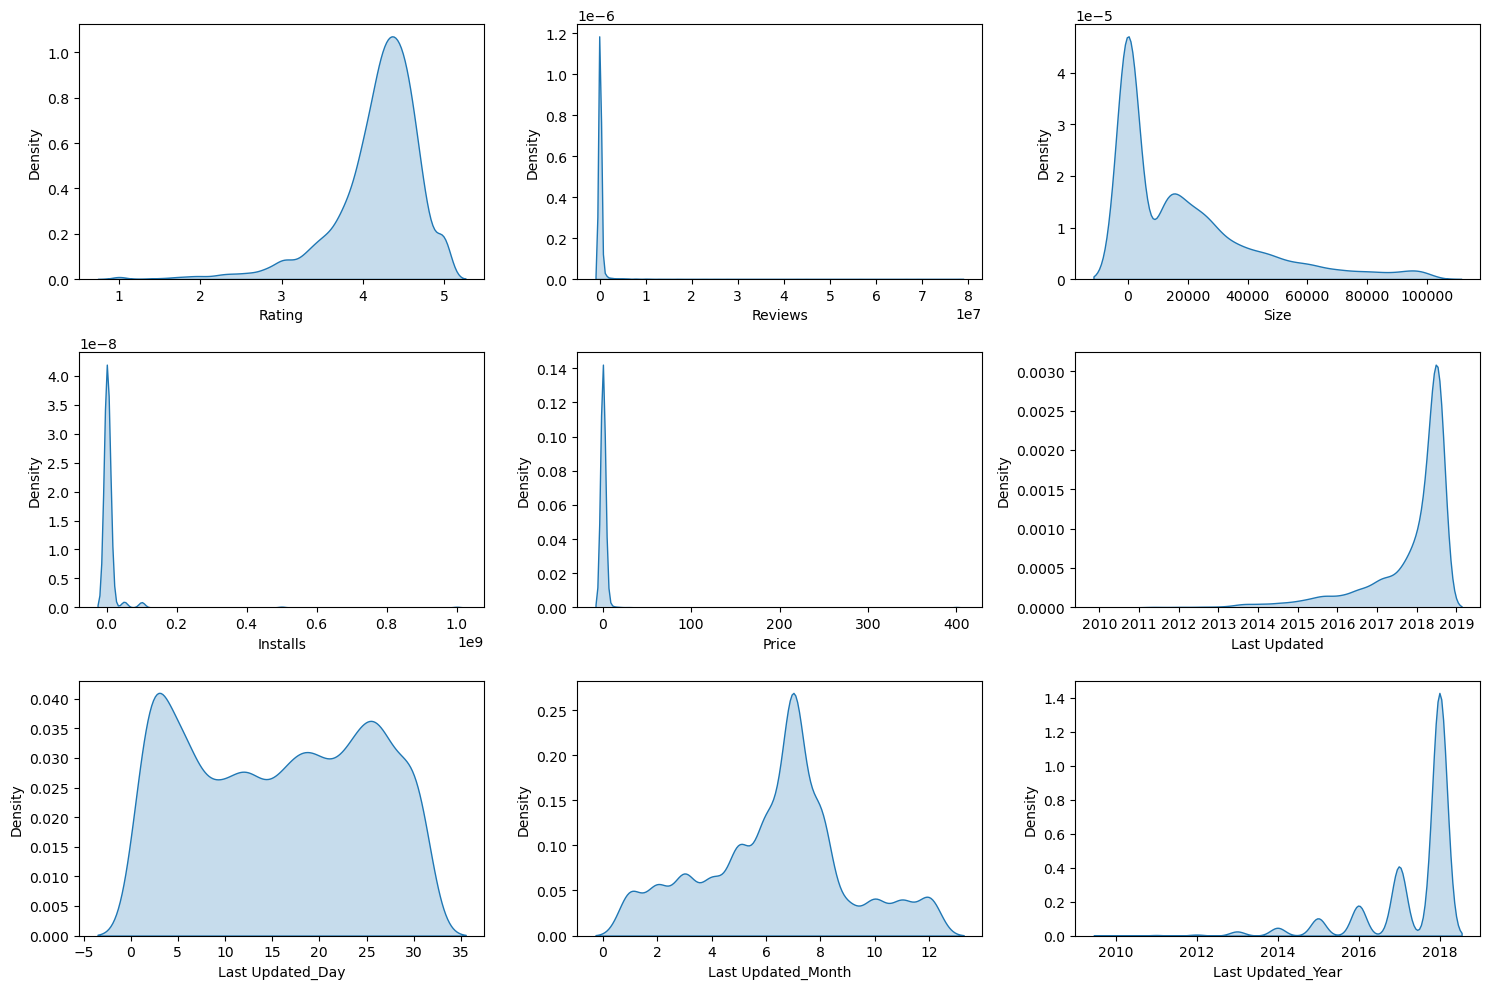

In [56]:
plt.figure(figsize=(15,10))

for i in range(0,len(numeric_features)):
    plt.subplot(3,3, i+1)
    sns.kdeplot(data=df_clean[numeric_features[i]], fill=True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show()

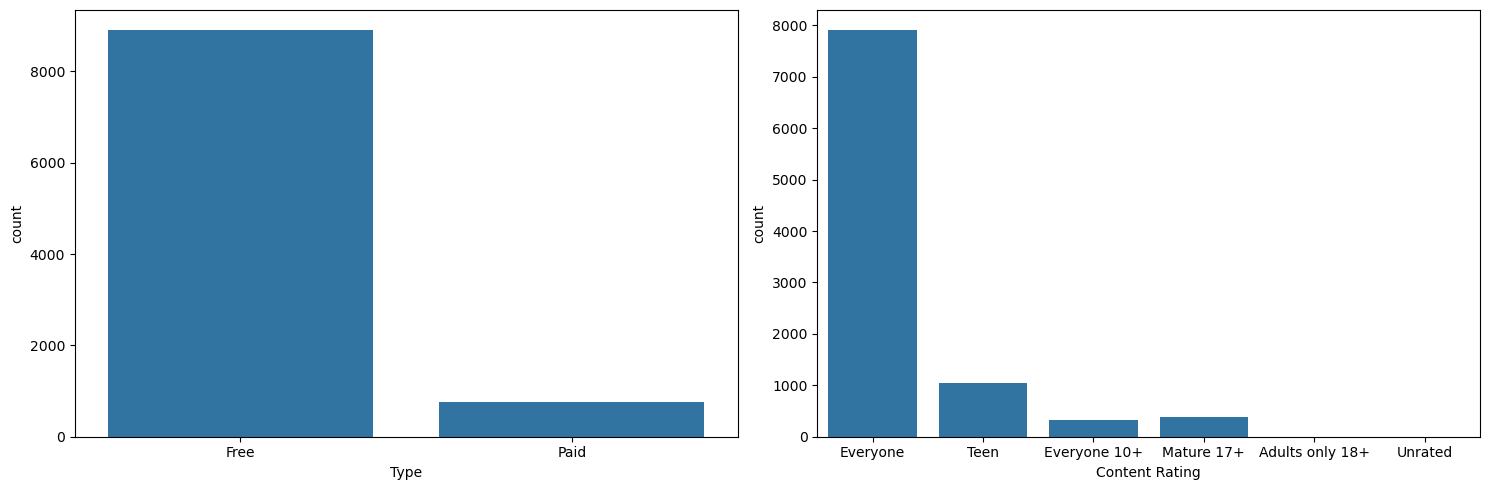

In [57]:
plt.figure(figsize=(15,5))

categories = ["Type", "Content Rating"]

for i in range(len(categories)):
    plt.subplot(1,2,i+1)
    sns.countplot(x=df_clean[categories[i]])
    plt.tight_layout()
plt.show() 

In [58]:
df_cat_ins = df_clean.groupby(by=["Category"])["Installs"].sum().sort_values(ascending=False).reset_index()
df_cat_ins

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


In [59]:
df_top_10_cat = df_cat_ins.head(10)
df_top_10_cat

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


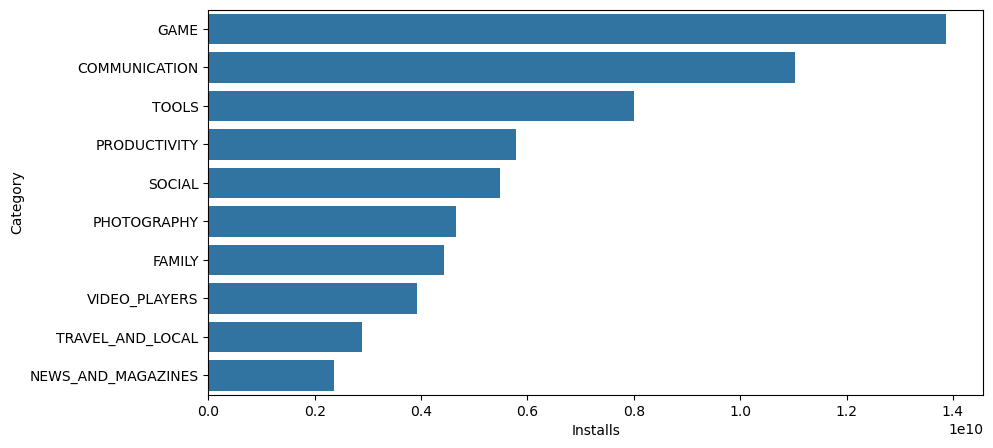

In [60]:
plt.figure(figsize=(10,5))

sns.barplot(x="Installs", y="Category", data=df_top_10_cat)
plt.show()

In [61]:
app_categories = ["GAME","COMMUNICATION","TOOLS","PRODUCTIVITY","SOCIAL"]

In [62]:
df_app_category = df_clean.groupby(by=["Category","App"])["Installs"].sum().reset_index()

In [63]:
df_app_category.sort_values(by="Installs",ascending=False,inplace=True)
df_app_category

,Category,App,Installs
9342,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,1000000000
1534,ENTERTAINMENT,Google Play Games,1000000000
9496,VIDEO_PLAYERS,Google Play Movies & TV,1000000000
6388,NEWS_AND_MAGAZINES,Google News,1000000000
1145,COMMUNICATION,Skype - free IM & video calls,1000000000
...,...,...,...
547,BUSINESS,CX Network,0
3661,FINANCE,Eu Sou Rico,0
2211,FAMILY,Command & Conquer: Rivals,0
3662,FINANCE,Eu sou Rico,0


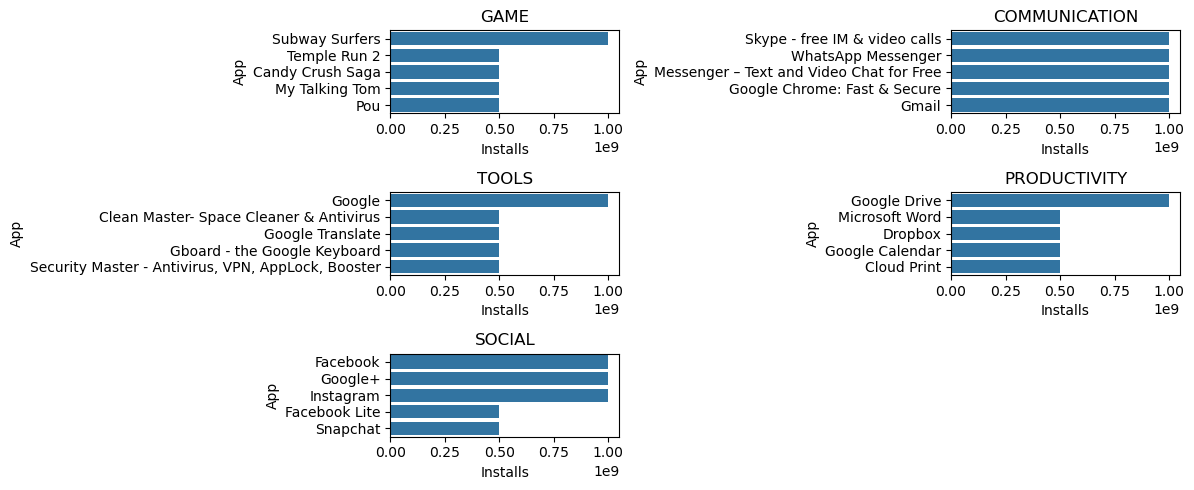

In [64]:
plt.figure(figsize=(12,5))

for i,app in enumerate(app_categories):
    df_app_by_cat = df_app_category[df_app_category['Category'] == app]
    df_app_by_cat = df_app_by_cat.head(5)
    #print(df_app_by_cat)

    plt.subplot(3,2, i+1)
    sns.barplot(data=df_app_by_cat,x="Installs",y="App")
    plt.title(app)
plt.tight_layout()
plt.show()

In [65]:
df_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated_Day,Last Updated_Month,Last Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [66]:
rating_df = df_clean.groupby(by=["Category","Installs","App"])["Rating"].sum().sort_values(ascending=False).reset_index()
rating_df

,Category,Installs,App,Rating
0,FAMILY,10,DN Employee,5.0
1,FAMILY,10,Chronolink DX,5.0
2,MEDICAL,500,FHR 5-Tier 2.0,5.0
3,HEALTH_AND_FITNESS,10,CB Fit,5.0
4,MEDICAL,100,Zen Leaf,5.0
...,...,...,...,...
9654,FAMILY,100,ASCP® CG Exam Flashcards 2018,0.0
9655,FAMILY,100,AW Radio,0.0
9656,FAMILY,100,Adhenarcos - Coupe Adhemar EY 2018,0.0
9657,FAMILY,100,Ah Bailar,0.0


In [67]:
top_rated_apps = rating_df[rating_df["Rating"] == 5]

In [68]:
df_clean["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [69]:
df_clean["Android Ver"] = df_clean["Android Ver"].replace("and up","",regex=True)

In [70]:
df_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated_Day,Last Updated_Month,Last Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [71]:
df_clean["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       'Varies with device', '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ',
       '2.1 ', '7.0 ', '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ',
       '4.4W ', '7.1 ', '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ',
       '2.0.1 ', '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [72]:
df_clean["Android Ver"] = df_clean["Android Ver"].replace("Varies with device",np.nan,regex=True).replace("W","",regex=True)

In [73]:
df_clean["Android Ver"].value_counts()

Android Ver
4.1              2202
4.0.3            1395
4.0              1285
4.4               829
2.3               616
5.0               512
4.2               372
2.3.3             273
2.2               239
3.0               231
4.3               221
2.1               133
1.6               116
6.0                54
7.0                42
3.2                36
2.0                32
5.1                22
1.5                20
3.1                10
2.0.1               7
8.0                 6
7.1                 3
5.0 - 8.0           2
4.0.3 - 7.1.1       2
1.0                 2
7.0 - 7.1.1         1
4.1 - 7.1.1         1
5.0 - 6.0           1
2.2 - 7.1.1         1
5.0 - 7.1.1         1
Name: count, dtype: int64

In [81]:
df_clean = df_clean[df_clean["Android Ver"].str.contains("-") == False]
df_clean["Android Ver"].value_counts()

Android Ver
4.1       2202
4.0.3     1395
4.0       1285
4.4        829
2.3        616
5.0        512
4.2        372
2.3.3      273
2.2        239
3.0        231
4.3        221
2.1        133
1.6        116
6.0         54
7.0         42
3.2         36
2.0         32
5.1         22
1.5         20
3.1         10
2.0.1        7
8.0          6
7.1          3
1.0          2
Name: count, dtype: int64

In [83]:
df_clean["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity', 'Simulation',
       'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adven

In [87]:
mean_genres_install = df_clean.groupby(by=["Genres"])["Installs"].mean() / 1000000

In [88]:
df_clean["Genres Encoded"] = mean_genres_install
df_clean["Genres Encoded"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10834   NaN
10835   NaN
10836   NaN
10837   NaN
10838   NaN
Name: Genres Encoded, Length: 8658, dtype: float64

In [91]:
mean_genres_install = mean_genres_install.to_dict()
mean_genres_install

{'Action': 11.255844429065743,
 'Action;Action & Adventure': 3.9109545454545454,
 'Adventure': 4.064319452054795,
 'Adventure;Action & Adventure': 21.23,
 'Adventure;Brain Games': 0.1,
 'Adventure;Education': 10.0,
 'Arcade': 20.540684218390805,
 'Arcade;Action & Adventure': 2.7084616153846155,
 'Arcade;Pretend Play': 1.0,
 'Art & Design': 1.8308589285714287,
 'Art & Design;Action & Adventure': 0.1,
 'Art & Design;Creativity': 0.285,
 'Art & Design;Pretend Play': 0.5,
 'Auto & Vehicles': 0.5753873205128205,
 'Beauty': 0.303941,
 'Board': 2.859415641025641,
 'Board;Action & Adventure': 2.001666666666667,
 'Board;Brain Games': 0.5254733333333333,
 'Board;Pretend Play': 0.0001,
 'Books & Reference': 0.6850892182741116,
 'Books & Reference;Creativity': 0.0001,
 'Books & Reference;Education': 0.0055,
 'Business': 1.0347099612403101,
 'Card': 2.200636585365854,
 'Card;Action & Adventure': 5.5,
 'Casino': 2.980018918918919,
 'Casual': 17.919875741935485,
 'Casual;Action & Adventure': 4.909181

In [93]:
df_clean["Genres Encoded"] = df_clean["Genres"].map(mean_genres_install)
df_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated_Day,Last Updated_Month,Last Updated_Year,Genres Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018,1.830859
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018,0.500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018,1.830859
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018,1.830859
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018,0.285000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1,18,6,2017,0.360664
10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0,29,9,2016,1.034710
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017,0.360664
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018,0.360664
